In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
from crm import CRM_general

Load historical data from excel-file

In [5]:
my_data = pd.read_excel('examples/Synthetic_cases.xlsx', '1x4Pwf2')

In [6]:
injectors = [item for item in my_data.columns if ('i' in item.lower() and 'time' not in item.lower())]
producers = [item for item in my_data.columns if ('p' in item.lower() and 'w' not in item.lower())]
bhp = [item for item in my_data.columns if 'pw' in item.lower()]

In [7]:
inj_input = my_data[injectors].values
q_output = my_data[producers].values
pwf = my_data[bhp].values

Normalize input data (optional)

In [8]:
# inj_input = (my_data[injectors]/my_data[injectors].max()).values
# q_output = (my_data[producers]/my_data[producers].max()).values
# pwf = (my_data[bhp]/my_data[bhp].max()).values

Calculate delta between given timestamps

In [9]:
dt = np.hstack(([0.], np.ones(q_output.shape[0]-1)))

Initialiяe the model

In [10]:
mymodel = CRM_general(5, 75, dt, inj_input, q_output, 'CRMP_pwf', pwf)

One can look at its weights (random ones before optimization)

In [11]:
mymodel.lambda_weights

array([[0.20961765, 0.23695706, 0.23844513, 0.31498017]])

In [12]:
mymodel.lambda_weights.sum(1)

array([1.])

In [13]:
mymodel.tau_prime

array([0.09831829, 5.98419516, 0.0579955 , 5.99567144])

In [14]:
mymodel.tau_weights

array([[1.74910143, 3.09445752, 5.55849772, 5.43401752]])

In [15]:
mymodel.J_pwf

array([[0.17097301, 8.84914078, 1.57782128, 7.13824788]])

In [16]:
mymodel.all_weights

array([0.09831829, 5.98419516, 0.0579955 , 5.99567144, 1.74910143,
       3.09445752, 5.55849772, 5.43401752, 0.20961765, 0.23695706,
       0.23844513, 0.31498017, 0.17097301, 8.84914078, 1.57782128,
       7.13824788])

Start weights optimization with preffered method 

In [17]:
%%time
mymodel.optimize()

Wall time: 33.5 s


 active_mask: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        cost: 4292.0637214401195
         fun: array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.17081126e+00,  0.00000000e+00, -4.23233137e+01, -1.48246420e+00,
       -1.26998608e+00,  0.00000000e+00, -1.33756062e+01, -3.07694660e-01,
        5.07488847e+00,  0.00000000e+00,  4.33760922e+00,  5.53011489e-01,
        8.02551721e+00,  0.00000000e+00,  9.67249917e+00,  8.49947100e-01,
        4.14893686e+00,  0.00000000e+00,  1.92163025e+00,  5.45676528e-01,
        5.06992544e+00,  0.00000000e+00,  4.38252422e+00,  6.59425957e-01,
        4.29441620e+00,  0.00000000e+00,  3.29706599e+00,  5.58078391e-01,
        5.88784597e+00,  0.00000000e+00,  6.43382093e+00,  6.18032261e-01,
        4.29474073e+00,  0.00000000e+00,  3.73714248e+00,  4.44479031e-01,
        4.84936929e+00,  0.00000000e+00,  5.11986293e+00,  4.43290543e-01,
        1.39056248e+01,  0.00000000e+00,  1.34081884e+01, 

Calculate total loquid prediction

In [18]:
preds = mymodel.predict(5, 296)

Plot the results

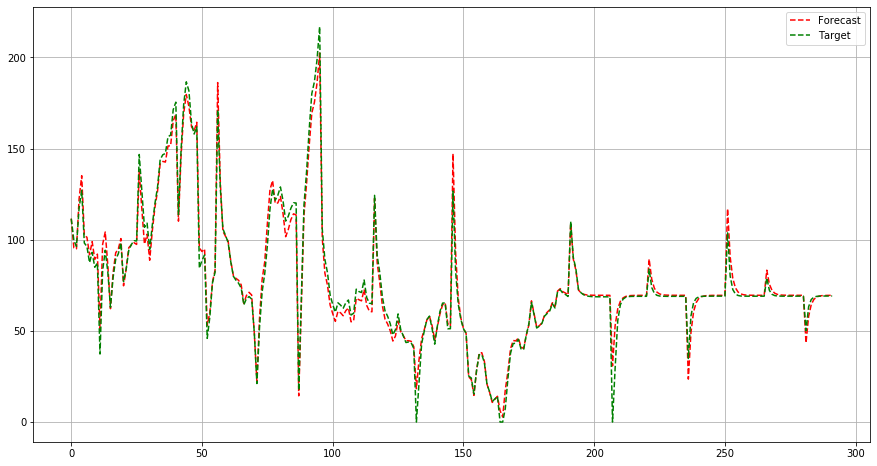

In [19]:
plt.figure(figsize=(15, 8))
plt.plot(preds[:, 0], 'r--', label='Forecast')
plt.plot(q_output[5:, 0], 'g--', label='Target')
# plt.plot(pwf[5:, 0], 'k--', label='Pressure Drop')
# plt.plot(inj_input[5:], 'k--', label='Injection')
plt.legend()
plt.grid()